In [298]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import random

In [299]:
# define var., function
x = symbols('x')
f = x**2+4*x
fprime = diff(f, x, 1)
fprime2 = diff(f, x, 2)

In [300]:
fprime

2*x + 4

In [301]:
fprime2

2

In [302]:
solveset(fprime2>=0, x, Reals)

Reals

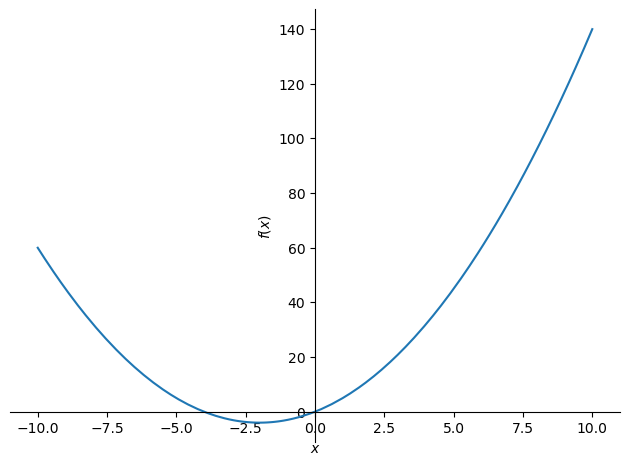

In [303]:
plotting.plot(f)

In [304]:
class GradientDescent:
    def __init__(self, f, x):
        self.f = f
        self.x = x
        self.fprime = diff(f, self.x, 1)
        self.fprime2 = diff(f, self.x, 2)
        self.convexRange = solveset(fprime2>=0, self.x, Reals)
        self.minima = (None, None)
        self.xpath = None
        self.ypath = None
    
    def apply(self):
        if not self.convexRange:
            print(f"Function is Concave")
            return None
        
        itr = 0
        startx = random.choice(np.linspace(-10, 10, 1000))
        oldx = startx
        newx = None
        eta = random.choice(np.linspace(0.01, 0.25, 100))
        self.xpath = [startx]
        print(f"Descent Start: Initial Point:{startx,self.f.evalf(subs={self.x:startx}) }, LearningRate: {eta}")
        
        while itr==0 or oldx!=newx:
            if itr>0:
                oldx = newx
            newx = oldx - eta*self.fprime.evalf(subs={self.x:oldx})
            self.xpath.append(newx)
            itr += 1
            
            if itr>=10000:
                break
        
        print(f"Descent Stopped: Iterations {itr}")
        self.ypath = [self.f.subs('x', val).evalf() for val in self.xpath]
        
        yval = self.f.subs('x', newx).evalf()
        self.minima = newx, yval
        
        print(f"Minima Obtained from Descent (x,y ): {self.minima}")
    
    def plot(self):
        if not self.convexRange:
            print(f"Function is Concave")
            return None
        minx, maxx = -10, 10
        miny, maxy = self.f.evalf(subs={self.x:minx}), self.f.evalf(subs={self.x:maxx})
        plotting.plot(self.f, markers=[{'args':[self.xpath, self.ypath, 'ro']}])

In [305]:
# Gradient Descent
gd = GradientDescent(f, symbols('x'))

In [306]:
gd.apply()

Descent Start: Initial Point:(5.035035035035035, 45.4917179441704), LearningRate: 0.12878787878787878
Descent Stopped: Iterations 127
Minima Obtained from Descent (x,y ): (-2.00000000000000, -4.00000000000000)


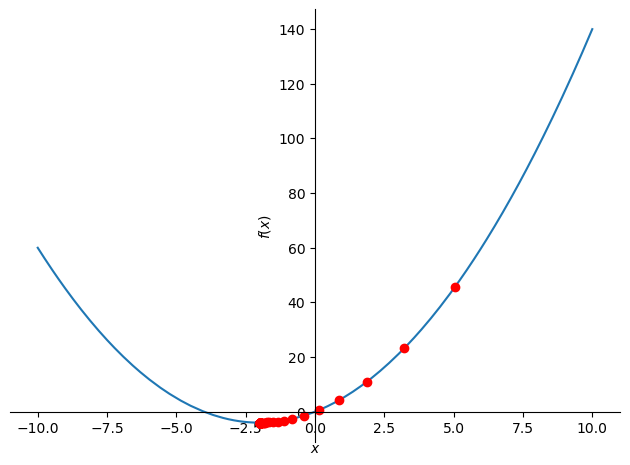

In [307]:
gd.plot()

In [308]:
gd2 = GradientDescent(f, symbols('x'))

In [309]:
gd2.apply()

Descent Start: Initial Point:(-9.65965965965966, 54.6703861018175), LearningRate: 0.13606060606060608
Descent Stopped: Iterations 118
Minima Obtained from Descent (x,y ): (-2.00000000000000, -4.00000000000000)


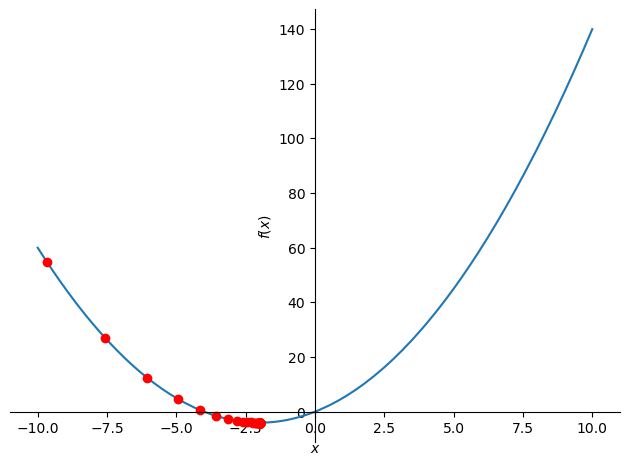

In [310]:
gd2.plot()